# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [ ]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

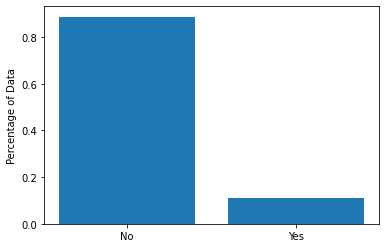

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

oversampler = RandomOverSampler()
X_scaled, y_train= oversampler.fit_resample(X_scaled, y_train)
     

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.032\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.393\ngini = 0.377\nsamples = 24111\nvalue = [18034, 6077]\nclass = No'),
 Text(0.125, 0.375, 'age <= 1.961\ngini = 0.245\nsamples = 14127\nvalue = [12106, 2021]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.217\nsamples = 13617\nvalue = [11929, 1688]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.453\nsamples = 510\nvalue = [177, 333]\nclass = Yes'),
 Text(0.375, 0.375, 'month_may <= 0.36\ngini = 0.482\nsamples = 9984\nvalue = [5928, 4056]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 7385\nvalue = [3642, 3743]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.212\nsamples = 2599\nvalue = [2286, 313]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.025\ngini = 0.402\nsamples = 27049\nvalue = [7546, 19503]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.481\nsamples = 14467\nvalue = [5807, 8660]\nclass = Yes'),
 T

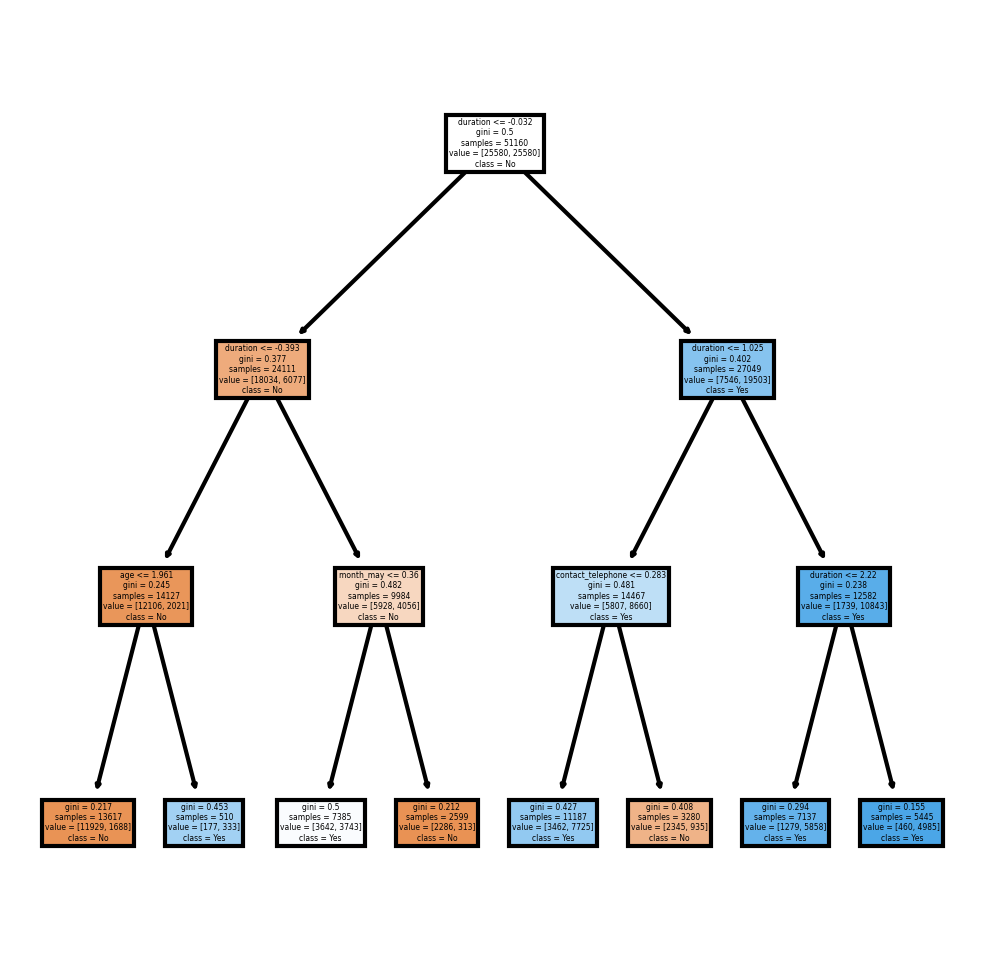

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [ ]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)
recall_raw=recall_score(y_true,y_pred)

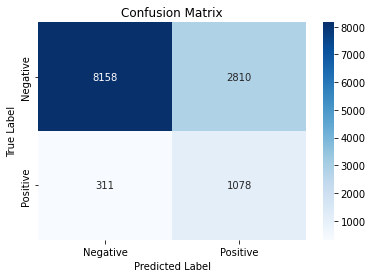

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [ ]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7561705915675325


In [ ]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)
recall_bag=recall_score(y_true,y_pred)

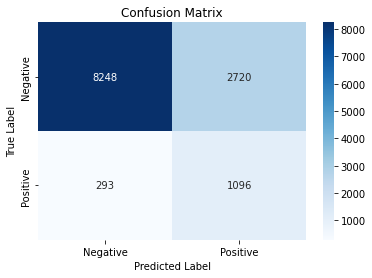

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)
recall_boost=recall_score(y_true,y_pred)

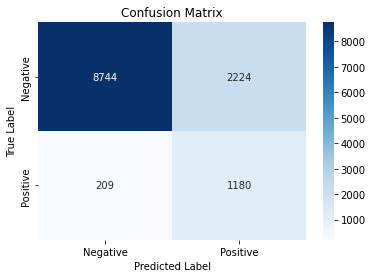

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from mlens.ensemble import SuperLearner
super_learner=SuperLearner(folds=10,random_state=42)

[MLENS] backend: threading


In [ ]:
base_estimators=[LogisticRegression(),RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(n_neighbors=5)]

super_learner.add(base_estimators)
### FIT TO TRAINING DATA
super_learner.fit(X_scaled,y_train)
### GET base_predictions
base_predictions=super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
### TRAIN YOUR METALEARNER
log_reg=LogisticRegression(fit_intercept=False).fit(base_predictions,y_train)
y_pred=log_reg.predict(super_learner.predict(X_test))   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rf=RandomForestClassifier().fit(base_predictions,y_train)
y_rf=rf.predict(super_learner.predict(X_test))

<ipython-input-28-018045baa571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier().fit(base_predictions,y_train)


In [ ]:
GN=GaussianNB().fit(base_predictions,y_train)
y_GN=GN.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
DT=DecisionTreeClassifier(max_depth=5).fit(base_predictions,y_train)
y_DT=DT.predict(super_learner.predict(X_test))

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5).fit(base_predictions,y_train)
y_KNN=KNN.predict(super_learner.predict(X_test))
     

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
### INTERPRET COEFFICIENTS

In [ ]:
log_reg.coef_

array([[-1.19924323, -7.38828046,  1.53946984,  0.68586765, 13.8479464 ]])

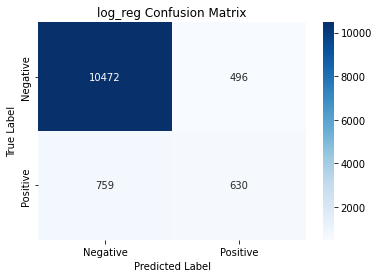

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
#LogisticRegression
from sklearn.metrics import recall_score
y_true = y_test
cm_log = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']
recall_log=recall_score(y_true,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('log_reg Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

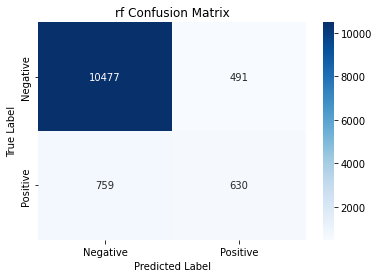

In [ ]:
#GussianNB
cm_GN = confusion_matrix(y_test, y_GN)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_GN, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('rf Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

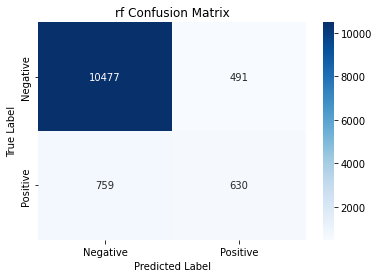

In [ ]:
#RandomForest
cm_rf = confusion_matrix(y_test, y_rf)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('rf Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

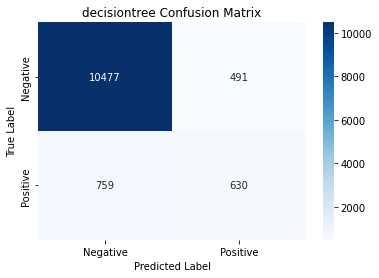

In [ ]:
#Decisontree
cm_dt = confusion_matrix(y_test, y_dt)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('decisiontree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [ ]:
# current focus: automate data cleaning process. need to understand the problem, understand how info can be used, data gathering, and create solutions

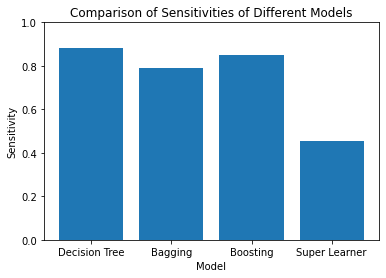

In [ ]:
# Calculate the sensitivity/recall for each model
sensitivities = []
sensitivities.append([recall_raw, recall_bag, recall_boost, recall_log])

sensitivities = {'Decision Tree': recall_raw, 'Bagging': recall_bag, 'Boosting': recall_boost, 'Super Learner': recall_log}
# Create a bar chart

fig, ax = plt.subplots()
ax.bar(sensitivities.keys(), sensitivities.values())
ax.set_xlabel('Model')
ax.set_ylabel('Sensitivity')
ax.set_ylim([0, 1])
ax.set_title('Comparison of Sensitivities of Different Models')
plt.show()
     

